In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import altair as alt
warnings.filterwarnings('ignore')
import os

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import nltk
import networkx as nx
import itertools
import random
import folium


In [4]:
df = pd.read_csv('../../data/job_data.csv')
df['query'] = df['query'].apply(lambda x: ' '.join(word if word == 'and' else word.title() for word in x.split()))

In [44]:
df.head(10)

,Unnamed: 0,title,company_name,location,via,description,schedule_type,salary,query,qualifications,responsibilities,benefits,degree,experience,remote
0,0,Ethereum Blockchain Developer (Remote),Ex Populus,Anywhere,Built In,Company Overview:\nEx Populus is a cutting-edg...,Full-time,NaN,Blockchain,['2-3 years of Software Development experience...,"['Design, maintain and deploy smart contracts ...",NaN,NaN,2.5,True
1,1,Blockchain Engineer,21.co,"New York, NY",Greenhouse,We are seeking a highly motivated and skilled ...,Full-time,180000.0,Blockchain,"[""Bachelor's or Master's degree in Computer Sc...","['As a Blockchain Engineer, you will be respon...",['(NYC only) Pursuant to Section 8-102 of titl...,Master's,NaN,False
2,2,Blockchain Course Instructor,Blockchain Institute of Technology,Anywhere,LinkedIn,"Are you a blockchain, cryptocurrency, NFT, Met...",Contractor,NaN,Blockchain,"['3+ years of experience in blockchain, crypto...",['Our expert technical team will provide the s...,NaN,NaN,3.0,True
3,3,Python based - Blockchain developer to join ex...,Upwork,Anywhere,Upwork,Need someone to join our existing team to spee...,Contractor,41600.0,Blockchain,"['Candidates must be willing to sign, non-disc...",['Will discuss details with the selected candi...,NaN,NaN,NaN,True
4,4,Blockchain DevOps Engineer (Remote),Telnyx,United States,Startup Jobs,"About Telnyx\n\nAt Telnyx, we’re architecting ...",Full-time,NaN,Blockchain,['You are a highly motivated and experienced B...,['To build a best-in-class Filecoin (FIL) Mini...,NaN,Bachelor's,NaN,True
5,5,Ethereum Developer Remote US (Blockchain-DeFi),Turnblock.io,Anywhere,ZipRecruiter,Our client is on crypto’s cutting edge technol...,Full-time,150000.0,Blockchain,"['5+ years of development experience', 'Experi...","['As a member of an agile engineering team, yo...",['Great compensation package'],NaN,5.0,True
6,6,Social Media Marketing (Blockchain/Crypto),Bitquery,Anywhere,AngelList,• Maintain a social media calendar\n• Build Bi...,Full-time,NaN,Blockchain,['English Proficiency (Written and Speaking) w...,['Put our Bitquery updates and educational con...,['Opportunity to work & collaborate with a tru...,NaN,NaN,True
7,7,Senior Software Engineer - Blockchain Network ...,Jobot,Anywhere,Dice,"competitive salaries, stock options, company p...",Full-time,175000.0,Blockchain,['At least 5 years of experience with designin...,"['Rotating breakfast menu served daily', 'Dinn...","['Salary: $150,000 - $200,000 per year', 'Our ...",NaN,5.0,True
8,8,Blockchain Developer,Atechstar,United States,OPTnation,Requirements: Strong software development back...,Full-time,141000.0,Blockchain,['Requirements: Strong software development ba...,NaN,NaN,NaN,NaN,True
9,9,DeFi Blockchain Co-Founder,Cryptops Exchange,Anywhere,LinkedIn,Cryptops is currently looking for a Co-Founder...,Full-time,NaN,Blockchain,['Can personally invest or immediately support...,['Other decentralized derivatives exchanges re...,NaN,NaN,NaN,True


In [51]:


# filter out 'Anywhere' and 'United States' locations
df_filtered = df.loc[~df['location'].isin(['Anywhere', 'United States'])]

# calculate the average salary for each location
df_avg_salary = df_filtered.groupby('location')['salary'].mean().reset_index()

# sort the locations by their frequency and select the top 5
df_top_locations = df_filtered['location'].value_counts().head(5).reset_index()
df_top_locations = df_avg_salary.loc[df_avg_salary['location'].isin(df_top_locations['index'])]

df_top_locations = df_top_locations.sort_values('salary', ascending=False)

# create the bar plot
bar = go.Bar(x=df_top_locations['location'], y=df_top_locations['salary'], name = '', marker=dict(color='crimson'),
             hovertemplate='<b>City: </b>%{x}<br><b>Average Salary: </b>$%{y:,.2f}')

# set the plot layout
layout = go.Layout(
                   xaxis_title='Location',
                   yaxis_title='Average Annual Salary (USD)',
                   yaxis=dict(tickformat='$,.0f'),
                   template='plotly_dark')

# create the figure and show the plot
fig = go.Figure(data=[bar], layout=layout)
fig.show()


fig.write_html("../../website/plots/plot-18.html")



In [50]:
# Filter out rows with location "Anywhere" or "United States"
df_filtered = df[~df['location'].isin(['Anywhere', 'United States'])]

# Group by location and count the number of jobs
grouped_df = df_filtered.groupby('location')['title'].count().reset_index()

# Get the top 5 locations by job count
top_5 = grouped_df.nlargest(5, 'title')

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=top_5['location'], y=top_5['title'],
                             hovertemplate='<b>City: </b> %{x}<br><b>Number of Jobs: </b>%{y}',
                             name='',
                             marker=dict(color='crimson'))])
fig.update_layout(
                  xaxis_title='Location', yaxis_title='Count of Jobs',
                  template='plotly_dark')
fig.show()

fig.write_html("../../website/plots/plot-1.html")


In [49]:
# Group by via and count the number of jobs
grouped_df = df.groupby('via')['title'].count().reset_index()

# Get the top 5 via values by job count
top_5 = grouped_df.nlargest(5, 'title')

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=top_5['via'], y=top_5['title'],
                             hovertemplate='<b>Posting Site: </b>%{x}<br><b>Number of Jobs: </b>%{y}',
                             name = '',
                             marker=dict(color='crimson'))])
fig.update_layout(title='',
                  xaxis_title='Job Domain', yaxis_title='Count of Jobs',
                  template='plotly_dark')
fig.show()

fig.write_html("../../website/plots/plot-2.html")


In [48]:
# group by title and count the number of jobs
grouped_df = df_filtered.groupby('title')['location'].count().reset_index()

# get the top 5 titles by job count
top_5 = grouped_df.nlargest(5, 'location')

# create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=top_5['title'], y=top_5['location'],
                             hovertemplate='<b>Title: </b>%{x}<b><br>Number of Jobs: </b>%{y}',
                             name = '',
                             marker=dict(color='crimson'))])
fig.update_layout(
                  xaxis_title='Job Title', yaxis_title='Count of Jobs',
                  template='plotly_dark')
fig.show()

fig.write_html("../../website/plots/plot-3.html")

In [52]:
# get the top 5 most occurring job titles
top_5_titles = df['title'].value_counts().nlargest(5).index.tolist()

# filter the dataframe to only include the top 5 titles
df_filtered = df[df['title'].isin(top_5_titles)]

# get the average salary for each title
grouped_df = df_filtered.groupby('title')['salary'].mean().reset_index()
grouped_df = grouped_df.sort_values('salary', ascending=False)
# create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=grouped_df['title'], y=grouped_df['salary'],
                             hovertemplate='<b>Title: </b>%{x}<b><br>Average Salary: </b>%{y:$,.2f}',
                             name='',
                             marker=dict(color='crimson'))])
fig.update_layout(
                  xaxis_title='Job Title', yaxis_title='Average Annual Salary (USD)',
                  template='plotly_dark')
fig.update_layout(
                  yaxis=dict(tickformat='$,.0f'),)

fig.show()

fig.write_html("../../website/plots/plot-7.html")

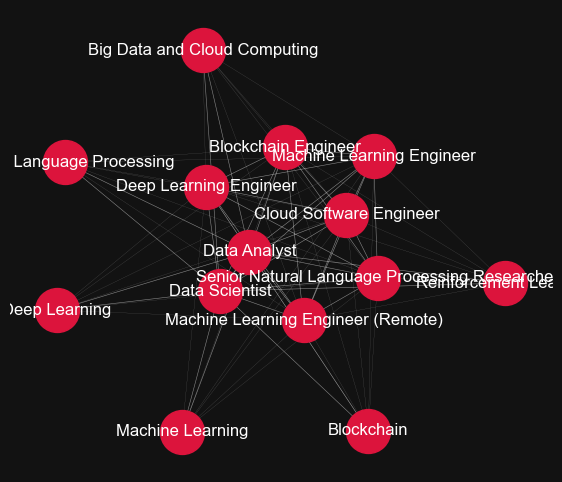

In [247]:

# create a co-occurrence matrix between job titles and queries
cooc_mat = pd.crosstab(df['title'], df['query'])

# downsample to only keep the top 10 most common queries
top_queries = cooc_mat.sum(axis=0).sort_values(ascending=False)[:8].index
cooc_mat = cooc_mat[top_queries]

# downsample to only keep the top 10 most common job titles
top_titles = cooc_mat.sum(axis=1).sort_values(ascending=False)[:8].index
cooc_mat = cooc_mat.loc[top_titles]

# create a NetworkX graph object
G = nx.Graph()

# add nodes for each job title and query
G.add_nodes_from(top_titles, bipartite=0)
G.add_nodes_from(top_queries, bipartite=1)

# add edges between job titles and queries based on the co-occurrence matrix
edges = [(title, query, cooc_mat.loc[title, query]) for title in top_titles for query in top_queries]
G.add_weighted_edges_from(edges)

# project the graph onto the job titles nodes to create a job title co-occurrence network
P = nx.bipartite.weighted_projected_graph(G, top_titles)

# create a layout for the nodes in the job title co-occurrence network
pos = nx.spring_layout(P, seed=42)

# set the plot style and settings
plt.style.use('dark_background')
#plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.facecolor'] = '#121212'

# draw the job title co-occurrence network
plt.figure(figsize=(7, 6))
nx.draw_networkx_nodes(P, pos, node_color='crimson', node_size=1000)
nx.draw_networkx_edges(P, pos, edge_color='white', alpha=0.5, width=[d['weight']/20 for (u,v,d) in P.edges(data=True)])
nx.draw_networkx_labels(P, pos, font_size=12, font_family='arial', font_color='white')
plt.axis('off')
#plt.show(block = False)




plt.savefig('../../website/plots/plot-17.png')

In [209]:
import mpld3
from mpld3 import plugins

In [77]:
# group the data by query and degree, and count the number of jobs
df_grouped = df.groupby(['query', 'degree']).size().reset_index(name='count')

# define the colors for each degree
colors = {'Bachelor\'s': 'rgb(31, 119, 180)', 'Master\'s': 'rgb(255, 127, 14)', 'PhD': 'rgb(44, 160, 44)'}

# create a trace for each degree
traces = []
for degree in df_grouped['degree'].unique():
    trace = go.Bar(
        x=df_grouped[df_grouped['degree'] == degree]['query'],
        y=df_grouped[df_grouped['degree'] == degree]['count'],
        name=degree,
        marker=dict(color=colors[degree]),
        hovertemplate='<b>Query: </b>%{x} '+ '<b><br>Number of Jobs: </b>%{y}'
    )
    traces.append(trace)

# set the layout for the chart
layout = go.Layout(
    barmode='group',
    template="plotly_dark",
    xaxis=dict(title='Query'),
    yaxis=dict(title='Count of Jobs')
)

# create the figure object and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show()

fig.write_html("../../website/plots/plot-4.html")



In [79]:

# create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=df['salary'], nbinsx=15, marker=dict(color='crimson'),
                                   hovertemplate='<b>Annual Salary Range:</b> %{x}<b><br>Number of Jobs: </b>%{y}', name = '')])

# cpdate the layout of the figure
fig.update_layout(
                  xaxis_title='Annual Salary (USD)', yaxis_title='Count of Jobs',
                  template='plotly_dark',
                  xaxis=dict(tickformat='$,.0f')
                  )

# show the figure
fig.show()

fig.write_html("../../website/plots/plot-5.html")

In [81]:

# create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=df['experience'], nbinsx=14, marker=dict(color='crimson'),
                                   hovertemplate='<b>Experience Range: </b>%{x} years<br><b>Number of Jobs: </b>%{y}', name = '')])

# update the layout of the figure
fig.update_layout(
                  xaxis_title='Experience Required (Years)', yaxis_title='Count of Jobs',
                  template='plotly_dark')

# show the figure
fig.show()

fig.write_html("../../website/plots/plot-6.html")

In [9]:
df['via'].value_counts()

LinkedIn                    66
ZipRecruiter                60
Upwork                      56
AngelList                   36
Lever                       23
                            ..
Teradyne Companies           1
Staples Jobs                 1
Alexandria, VA - Geebo       1
Parsons Corporation Jobs     1
WDHN Jobs                    1
Name: via, Length: 219, dtype: int64

In [279]:


# group by state and calculate average salary
state_salaries = df.groupby('state').mean().reset_index()

# load US states geojson data
geo_data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'

# create map centered on the US
map = folium.Map(location=[37, -102], zoom_start=4)

# add heatmap layer
folium.Choropleth(
    geo_data=geo_data + '/us-states.json',
    name='choropleth',
    data=state_salaries,
    columns=['state', 'salary'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Salary by State (USD)',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'salary'],
        aliases=['State', 'Average Salary'],
        style="background-color: white; color: #333333; font-family: Arial; font-size: 12px; padding: 10px;"
    )
).add_to(map)

# add layer control
folium.LayerControl().add_to(map)

# show map
map

map.save("../../website/plots/plot-11.html")



In [189]:
df['company_name'].value_counts()

Booz Allen Hamilton                       17
Apple                                     10
Deloitte                                   8
Walmart                                    7
Leidos                                     7
                                          ..
Trustees of University of Pennsylvania     1
John Deere                                 1
Northwestern Mutual                        1
MCKESSON                                   1
Blockdaemon                                1
Name: company_name, Length: 221, dtype: int64

In [193]:
# Get the top 5 most occurring company names
top_5 = df['company_name'].value_counts().head(5).index.tolist()

# Get the average salary for each of the top 5 companies
for company in top_5:
    avg_salary = df[df['company_name'] == company]['salary'].mean()
    print(f"{company}: ${avg_salary:.2f}")


Booz Allen Hamilton: $136403.12
Apple: $173942.00
Deloitte: $149563.75
Walmart: $nan
Leidos: $176218.00


In [184]:
# group by state and calculate the number of jobs
state_jobs = df.groupby('state')['title'].count().reset_index()
state_jobs.columns = ['state', 'jobs']

# load US states geojson data
geo_data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'

# create map centered on the US
map = folium.Map(location=[37, -102], zoom_start=4)

# Add heatmap layer
folium.Choropleth(
    geo_data=geo_data + '/us-states.json',
    name='choropleth',
    data=state_jobs,
    columns=['state', 'jobs'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Jobs by State',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'jobs'],
        aliases=['State', 'Number of Jobs'],
        style="background-color: white; color: #333333; font-family: Arial; font-size: 12px; padding: 10px;"
    )
).add_to(map)

# add layer control
folium.LayerControl().add_to(map)

# show map
map

#map.save("../../website/plots/plot-16.html")



In [78]:
# define the trace for each degree
traces = []
for degree in df['degree'].unique():
    trace = go.Scatter(
        x=df[df['degree'] == degree]['experience'],
        y=df[df['degree'] == degree]['salary'],
        mode='markers',
        name=degree,
        marker=dict(size=8),
        hovertemplate='<b>Experience Required: </b>%{x} years<br><b>Salary: </b>$%{y:,.0f}'
    )
    traces.append(trace)

layout = go.Layout(
    xaxis=dict(title='Experience Required (Years)', range = [0,10]),
    yaxis=dict(title='Annual Salary (USD)', tickformat='$,.0f'),
    template = 'plotly_dark',
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1.1,
            y=1.2,
            text='Explore experience and salary correlations for different degrees!',
            showarrow=False,
            font=dict(family='Arial', size=14, color='white'),
            bgcolor='crimson',
            bordercolor='crimson',
            borderwidth=2,
            borderpad=4,
            xanchor='right',
            yanchor='top'
        )
    ]
)
# create the figure object and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show()

#How do i add an annotation to the top right which says "Play with the graph!"

fig.write_html("../../website/plots/plot-8.html")



In [83]:

# group the data by 'remote'
grouped_df = df.groupby('remote')

# create the figure object
fig = go.Figure()

# add the box traces for the remote groups
for remote, group_df in grouped_df:
    fig.add_trace(go.Box(
        y=group_df.loc[group_df['remote'] == remote, 'salary'],
        name=str(remote),
        hovertemplate = ('Max: $%{y:.2f}<br>' +
                 'Upper Fence: $%{upperfence:.2f}<br>' +
                 '75th Percentile: $%{q3:.2f}<br>' +
                 'Median: $%{median:.2f}<br>' +
                 '25th Percentile: $%{q1:.2f}<br>' +
                 'Lower Fence: $%{lowerfence:.2f}<br>' +
                 'Min: $%{min}<br>' +
                 '<extra></extra>'),
        marker_color='crimson' if remote else 'lightseagreen'))

# create the dropdown menu options
dropdown_options = [
    {'label': 'Remote', 'value': 'remote'},
    {'label': "Bachelor's", 'value': "Bachelor's"},
    {'label': "Master's", 'value': "Master's"},
    {'label': 'PhD', 'value': 'PhD'}
]

# define the update menu
updatemenu = go.layout.Updatemenu(
    buttons=[
        dict(label=option['label'],
             method='update',
             args=[{'y': [df.loc[(df['remote'] == True) & (df['degree'] == option['value']), 'salary'],
                           df.loc[(df['remote'] == False) & (df['degree'] == option['value']), 'salary']]},
                   {'yaxis': {'title': 'Annual Salaries for {} Holders (USD)'.format(option['value'], tickprefix = '$', tickformat=',.0f')}},
                   {'hovertemplate': 'Max: $%{y:.0f}<br>Upper Fence: $%{upperfence:.0f}<br>Third Quartile: $%{q3:.0f}<br>Median: $%{median:.0f}<br>First Quartile: $%{q1:.0f}<br>Lower Fence: $%{lowerfence:.0f}<br>Min: $%{min:.0f}<br>Count: %{ydata:.0f}'}])
        for option in dropdown_options[1:]
    ],
    direction='down',
    showactive=True,
    x=1.2,
    y=1.2
)

# add the updatemenu to the layout

# define the layout
fig.update_layout(
    xaxis=dict(title='Work Remotely?'),
    yaxis=dict(title='Annual Salaries for Bachelor\'s Holders (USD)', tickprefix = '$', tickformat=',.0f'),
    template="plotly_dark"
)

fig.update_layout(yaxis_tickprefix='$', yaxis_tickformat=',.0f')

fig.update_layout(updatemenus=[updatemenu],    yaxis=dict(title='Annual Salaries for Bachelor\'s Holders (USD)', tickprefix = '$', tickformat=',.0f'))

# show the figure
fig.show()

fig.write_html("../../website/plots/plot-9.html")

In [234]:
df = pd.read_csv('../../data/job_data.csv')


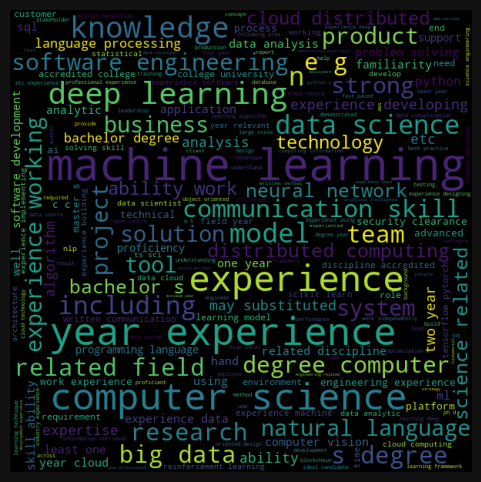

In [235]:

# drop rows with missing values in the qualifications column
df.dropna(subset=['qualifications'], inplace=True)

# tokenize, remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['qualifications'] = df['qualifications'].astype(str)
df['qualifications'] = df['qualifications'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x) if w.lower() not in stop_words])

# create the word cloud
text = ' '.join(df['qualifications'].sum())
wordcloud = WordCloud(width=600, height=600).generate(text)

# display the word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file('../../website/plots/plot-12.png')

In [236]:
df = pd.read_csv('../../data/job_data.csv')


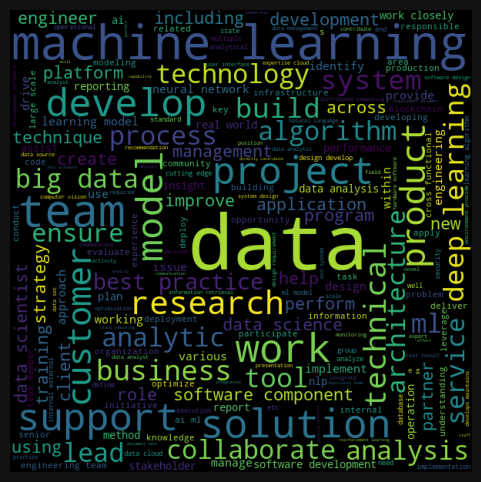

In [242]:

# drop rows with missing values in the qualifications column
df.dropna(subset=['responsibilities'], inplace=True)

# tokenize, remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['responsibilities'] = df['responsibilities'].astype(str)
df['responsibilities'] = df['responsibilities'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x) if w.lower() not in stop_words])

# create the word cloud
text = ' '.join(df['responsibilities'].sum())
wordcloud = WordCloud(width=600, height=600).generate(text)

# display the word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file('../../website/plots/plot-13.png')

In [42]:
df['title'].value_counts()

[data, analyst]                                                               22
[data, scientist]                                                             21
[machine, learning, engineer]                                                 20
[deep, learning, engineer]                                                    14
[blockchain, engineer]                                                        10
                                                                              ..
[senior, machine, learning, perception, engineer]                              1
[hewlett, packard, lab, -, machine, learning, research, scientist, ...]        1
[hewlett, packard, lab, -, machine, learning, research, associate, intern]     1
[need, expert, consult, gnns, (, graph, neural, network, ...]                  1
[natural, language, processing, engineer]                                      1
Name: title, Length: 454, dtype: int64

In [241]:
df = pd.read_csv('../../data/job_data.csv')


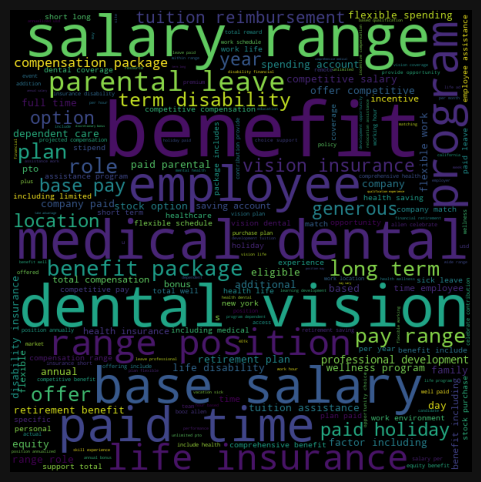

In [240]:

# drop rows with missing values in the qualifications column
df.dropna(subset=['benefits'], inplace=True)

# tokenize, remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['benefits'] = df['benefits'].astype(str)
df['benefits'] = df['benefits'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x) if w.lower() not in stop_words])

# create the word cloud
text = ' '.join(df['benefits'].sum())
wordcloud = WordCloud(width=600, height=600).generate(text)

# display the word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file('../../website/plots/plot-14.png')

In [190]:
df = pd.read_csv('../../data/job_data.csv')


In [191]:
state_locations = {
    'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
              'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
              'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
              'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
              'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
              'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'latitude': [32.806671, 61.370716, 33.729759, 34.969704, 36.116203, 39.059811, 41.597782, 39.318523, 38.897438, 27.766279,
                 33.040619, 21.094318, 44.240459, 40.349457, 39.849426, 42.011539, 38.526600, 37.668140, 31.169546,
                 44.693947, 39.063946, 42.230171, 43.326618, 45.694454, 32.741646, 38.456085, 46.921925, 41.125370,
                 38.313515, 43.452492, 40.298904, 34.840515, 42.165726, 35.630066, 47.528912, 40.388783, 35.565342,
                 44.572021, 40.590752, 41.680893, 33.856892, 44.299782	, 35.747845, 31.054487	, 40.150032	, 44.045876, 37.769337, 
                 47.400902, 38.491226, 44.268543, 42.755966],
    'longitude': [-86.791130, -152.404419, -111.431221, -92.373123, -119.681564, -105.311104, -72.755371, -75.507141, -77.026817, 
                  -81.686783, -83.643074, -157.498337, -114.478828, -88.986137, -86.258278, -93.210526, -96.726486,
                  -84.670067, -91.867805, -69.381927, -76.802101, -71.537994, -84.536095, -93.900192, -89.398528,
                  -92.288981, -110.454353, -99.901813, -117.055374, -71.572395, -74.405661, -106.018066, -74.948051,
                  -79.806419, -99.784012, -82.764915, -96.928917, -122.070938, -77.209755, -77.209755, -80.945007, -99.438828, -86.692345, -97.563461, -111.862434, 
                  -72.710686, -78.169968, -121.490494, -80.954453, -89.616508,
                  -107.302490]
}

state_locations = pd.DataFrame(state_locations)

In [192]:
df_cleaned = df.dropna(subset=['state'])


In [193]:
# merge the cleaned dataframe with the 'state_locations' dictionary
merged_df = df_cleaned.merge(pd.DataFrame(state_locations), on='state', how='left')


In [194]:
# calculate the count of jobs for each state
job_counts = df['state'].value_counts().reset_index()
job_counts.columns = ['state', 'job_count']

# merge the job_counts dataframe with the state_locations dictionary
merged_df = job_counts.merge(pd.DataFrame(state_locations), on='state', how='left')

# create a map
fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lat=merged_df['latitude'],
        lon=merged_df['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=merged_df['job_count'],
            sizemode='area',
            sizeref=0.1,
            color='crimson',
            opacity=0.7
        ),
        text=merged_df['state'],
        hovertemplate='<b>%{text}</b><br>Job Count: %{marker.size}<extra></extra>'
    )
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center=dict(lat=37.0902, lon=-95.7129),
    hovermode='closest',
    margin=dict(l=0, r=0, t=40, b=0),
    autosize=True,
    showlegend=False
)

fig.show()

fig.write_html("../../website/plots/plot-16.html")
